## THEORY_- ALTERNATE MARK INVERSION(BIPOLAR)

AMI (Alternate Mark Inversion) is a synchronous clock encoding technique that uses bipolar pulses to represent logical 1. The next logic 1 is represented by a pulse of the opposite polarity. Hence a sequence of logical 1s are represented by a sequence of pulses of alternating polarity. T

Example of AMI encoding
A logical 1 value is represented by high or low level - and a zero by no signal. The logical 1 by pulses use alternating polarity.

# RULES

Zero (0) Representation: A logical '0' is represented by no signal, i.e., the line remains at zero voltage level.

One (1) Representation: A logical '1' alternates between positive and negative voltage levels. The polarity of the pulse for a '1' alternates each time a '1' appears in the data stream.

    The first '1' in a sequence is represented by a positive voltage pulse.
    The next '1' is represented by a negative voltage pulse.
    This alternating pattern continues, ensuring that no two consecutive '1's produce pulses of the same polarity.

# ALGORITHM

Algorithm: AMI Encoding and Plotting
Input: A binary data string.

Output: A plotted visualization of the AMI encoded waveform.

Step 1: Initialize Variables
polarity: Set to 1. This variable will alternate between 1 and -1 to represent positive and negative pulses respectively for logical '1's.
encoded_signal: An empty list that will be filled with the encoded signal levels.
time: An empty list that will track the time intervals for each bit's representation.

Step 2: Encode Binary Data
For each bit in the binary data string:
If the bit is '1':
Append the current polarity to encoded_signal twice (to maintain the level for the entire duration of the bit).
Multiply polarity by -1 to toggle it for the next '1'.
If the bit is '0':
Append two zeros to encoded_signal (to represent no signal for the duration of the bit).
Extend the time list by appending the current bit's start and end time (i.e., i and i + 1).

Step 3: Extend Time for Final Transition
Add one final point to the time list to complete the last step in the plot, ensuring that the plot extends to cover the duration of the last bit processed.

Step 4: Plot the AMI Waveform
Set up the plot:
Create a figure with a specified size.
Use a step plot function to plot encoded_signal against time with transitions aligned to the right of each interval (where='post').
Configure plot aesthetics:
Set the plot title, x-axis, and y-axis labels.
Define the y-axis limits to clearly distinguish between positive, negative, and zero levels.
Enable grid lines for better readability.
Set x-axis ticks to correspond to each bit index, enhancing clarity.

Step 5: Display the Plot
Render the plot to visually represent the AMI encoded data.

# CODE

In [10]:
def ami_encode(data):
    # Starting with a positive pulse for the first '1'
    polarity = 1
    encoded_signal = []
    time = []

    # Encoding each bit
    for i, bit in enumerate(data):
        if bit == '1':
            encoded_signal.extend([polarity, polarity])
            # Flip polarity after every '1'
            polarity *= -1
        else:
            encoded_signal.append(0)
            encoded_signal.append(0)  # For each '0', add two zeros to maintain the length
        # Extend the time for plotting
        time.extend([i, i + 1])

    return time, encoded_signal


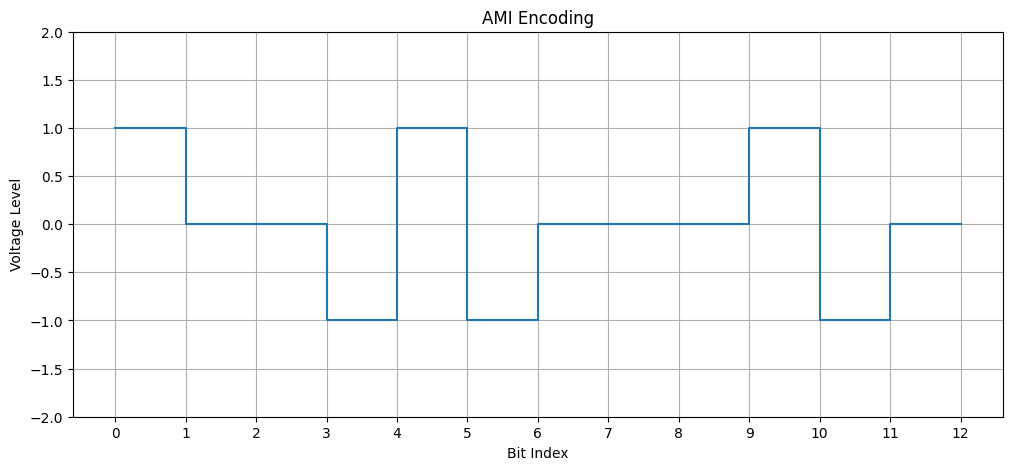

In [11]:

def plot_ami(data):
    time, encoded_signal = ami_encode(data)
    plt.figure(figsize=(12, 5))
    plt.step(time, encoded_signal, where='post')  # 'encoded_signal' already correctly ends
    plt.title('AMI Encoding')
    plt.xlabel('Bit Index')
    plt.ylabel('Voltage Level')
    plt.ylim(-2, 2)  # Set y-axis limits to clearly show the pulses
    plt.grid(True)
    plt.xticks(range(len(data) + 1))  # Set x-axis ticks to match the bit indices
    plt.show()

# Example binary data
binary_data = "100111000110"
plot_ami(binary_data)